In [1]:
sbox = [
    # 0    1    2    3    4    5    6    7    8    9    a    b    c    d    e    f 
    0x63,0x7c,0x77,0x7b,0xf2,0x6b,0x6f,0xc5,0x30,0x01,0x67,0x2b,0xfe,0xd7,0xab,0x76, # 0
    0xca,0x82,0xc9,0x7d,0xfa,0x59,0x47,0xf0,0xad,0xd4,0xa2,0xaf,0x9c,0xa4,0x72,0xc0, # 1
    0xb7,0xfd,0x93,0x26,0x36,0x3f,0xf7,0xcc,0x34,0xa5,0xe5,0xf1,0x71,0xd8,0x31,0x15, # 2
    0x04,0xc7,0x23,0xc3,0x18,0x96,0x05,0x9a,0x07,0x12,0x80,0xe2,0xeb,0x27,0xb2,0x75, # 3
    0x09,0x83,0x2c,0x1a,0x1b,0x6e,0x5a,0xa0,0x52,0x3b,0xd6,0xb3,0x29,0xe3,0x2f,0x84, # 4
    0x53,0xd1,0x00,0xed,0x20,0xfc,0xb1,0x5b,0x6a,0xcb,0xbe,0x39,0x4a,0x4c,0x58,0xcf, # 5
    0xd0,0xef,0xaa,0xfb,0x43,0x4d,0x33,0x85,0x45,0xf9,0x02,0x7f,0x50,0x3c,0x9f,0xa8, # 6
    0x51,0xa3,0x40,0x8f,0x92,0x9d,0x38,0xf5,0xbc,0xb6,0xda,0x21,0x10,0xff,0xf3,0xd2, # 7
    0xcd,0x0c,0x13,0xec,0x5f,0x97,0x44,0x17,0xc4,0xa7,0x7e,0x3d,0x64,0x5d,0x19,0x73, # 8
    0x60,0x81,0x4f,0xdc,0x22,0x2a,0x90,0x88,0x46,0xee,0xb8,0x14,0xde,0x5e,0x0b,0xdb, # 9
    0xe0,0x32,0x3a,0x0a,0x49,0x06,0x24,0x5c,0xc2,0xd3,0xac,0x62,0x91,0x95,0xe4,0x79, # a
    0xe7,0xc8,0x37,0x6d,0x8d,0xd5,0x4e,0xa9,0x6c,0x56,0xf4,0xea,0x65,0x7a,0xae,0x08, # b
    0xba,0x78,0x25,0x2e,0x1c,0xa6,0xb4,0xc6,0xe8,0xdd,0x74,0x1f,0x4b,0xbd,0x8b,0x8a, # c
    0x70,0x3e,0xb5,0x66,0x48,0x03,0xf6,0x0e,0x61,0x35,0x57,0xb9,0x86,0xc1,0x1d,0x9e, # d
    0xe1,0xf8,0x98,0x11,0x69,0xd9,0x8e,0x94,0x9b,0x1e,0x87,0xe9,0xce,0x55,0x28,0xdf, # e
    0x8c,0xa1,0x89,0x0d,0xbf,0xe6,0x42,0x68,0x41,0x99,0x2d,0x0f,0xb0,0x54,0xbb,0x16  # f
]

In [2]:
def aes_internal(inputdata, key):
    return sbox[inputdata ^ key]

In [3]:
#Simple test vectors - if you get the check-mark printed all OK.
assert(aes_internal(0xAB, 0xEF) == 0x1B)
assert(aes_internal(0x22, 0x01) == 0x26)
print("✔️ OK to continue!")

✔️ OK to continue!


In [4]:
def aes_secret(inputdata):
    secret_key = 0xEF
    return aes_internal(secret_key, inputdata)

In [5]:
import random
input_data = [random.randint(0,255) for _ in range(0, 1000)]
assert(len(input_data) == 1000)
print("✔️ OK to continue!")


✔️ OK to continue!


In [6]:
leaked_data = [(aes_secret(a) & 0x01) for a in input_data]
print(leaked_data)


[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 

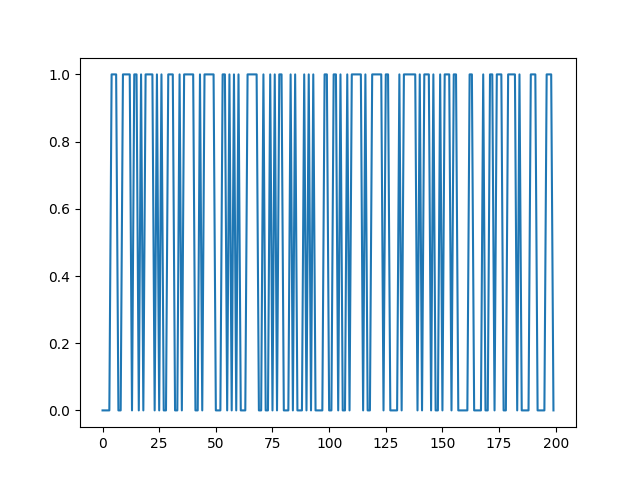

In [7]:
import matplotlib.pylab as plt
%matplotlib widget
plt.plot(leaked_data[0:200])
plt.show()

In [8]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")

    if max(a) != max(b):
        raise ValueError("Arrays max() should be the same!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [9]:
#Simple test vectors - if you get the check-mark printed all OK.
assert(num_same([0,1,0,1,1,1,1,0], [0,1,0,1,1,1,1,0]) == 8)
assert(num_same([1,1,1,0,0,0,0,0], [0,1,0,1,1,1,1,0]) == 2)
assert(num_same([1, 0], [0, 1]) == 0)
print("✔️ OK to continue!")

✔️ OK to continue!


In [10]:
for guess in range(0, 256):   
    
    #Get a hypothetical leakage list - use aes_internal(guess, input_byte) and mask off to only get value of lowest bit.
    #You'll need to make this into a list as wel.
    hypothetical_leakage = [aes_internal(guess, input_byte) & 0x01 for input_byte in input_data]
    
    #Use our function
    same_count = num_same(hypothetical_leakage, leaked_data)   
    
    #Print for debug
    print("Guess {:02X}: {:4d} bits same".format(guess, same_count))
    

Guess 00:  458 bits same
Guess 01:  428 bits same
Guess 02:  487 bits same
Guess 03:  538 bits same
Guess 04:  448 bits same
Guess 05:  497 bits same
Guess 06:  477 bits same
Guess 07:  521 bits same
Guess 08:  491 bits same
Guess 09:  488 bits same
Guess 0A:  497 bits same
Guess 0B:  541 bits same
Guess 0C:  527 bits same
Guess 0D:  536 bits same
Guess 0E:  519 bits same
Guess 0F:  517 bits same
Guess 10:  489 bits same
Guess 11:  537 bits same
Guess 12:  472 bits same
Guess 13:  502 bits same
Guess 14:  500 bits same
Guess 15:  503 bits same
Guess 16:  568 bits same
Guess 17:  516 bits same
Guess 18:  490 bits same
Guess 19:  475 bits same
Guess 1A:  451 bits same
Guess 1B:  528 bits same
Guess 1C:  478 bits same
Guess 1D:  447 bits same
Guess 1E:  437 bits same
Guess 1F:  497 bits same
Guess 20:  486 bits same
Guess 21:  561 bits same
Guess 22:  459 bits same
Guess 23:  474 bits same
Guess 24:  522 bits same
Guess 25:  472 bits same
Guess 26:  532 bits same
Guess 27:  506 bits same


In [11]:
import numpy as np

guess_list = [0] * 256

for guess in range(0, 256):   
    
    #Get a hypothetical leakage list - use aes_internal(guess, input_byte) and mask off to only get value of lowest bit
    hypothetical_leakage = [aes_internal(guess, input_byte) & 0x01 for input_byte in input_data]
    
    #Use our function
    same_count = num_same(hypothetical_leakage, leaked_data)   
    
    #Track the number of correct bits
    guess_list[guess] = same_count

#Use np.argsort to generate a list of indicies from low to high, then [::-1] to reverse the list to get high to low.
sorted_list = np.argsort(guess_list)[::-1]

#Print top 5 only
for guess in sorted_list[0:5]:
        print("Key Guess {:02X} = {:04d} matches".format(guess, guess_list[guess]))

Key Guess EF = 1000 matches
Key Guess F9 = 0583 matches
Key Guess 84 = 0577 matches
Key Guess 3D = 0572 matches
Key Guess 89 = 0570 matches


In [12]:
def get_bit(data, bit):
    if data & (1<<bit):
        return 1
    else:
        return 0
assert(get_bit(0xAA, 7) == 1)
assert(get_bit(0xAA, 0) == 0)
assert(get_bit(0x00, 7) == 0)
print("✔️ OK to continue!")

✔️ OK to continue!


In [13]:
def aes_leakage_guess(keyguess, inputdata, bit):
    return get_bit(aes_internal(keyguess, inputdata), bit)
assert(aes_leakage_guess(0xAB, 0x22, 4) == 0)
assert(aes_leakage_guess(0xAB, 0x22, 3) == 0)
assert(aes_leakage_guess(0xAB, 0x22, 2) == 1)
assert(aes_leakage_guess(0xAB, 0x22, 1) == 1)
assert(aes_leakage_guess(0xAB, 0x22, 0) == 1)
print("✔️ OK to continue!")

✔️ OK to continue!


In [14]:
for bit_guess in range(0, 8):
    guess_list = [0] * 256
    print("Checking bit {:d}".format(bit_guess))
    for guess in range(0, 256):

        #Get a hypothetical leakage for guessed bit (ensure returns 1/0 only)
        #Use bit_guess as the bit number, guess as the key guess, and data from input_data
        hypothetical_leakage = [aes_leakage_guess(guess, input_byte, bit_guess) for input_byte in input_data]

        #Use our function
        same_count = num_same(hypothetical_leakage, leaked_data)   

        #Track the number of correct bits
        guess_list[guess] = same_count

    sorted_list = np.argsort(guess_list)[::-1]

    #Print top 5 only
    for guess in sorted_list[0:5]:
            print("Key Guess {:02X} = {:04d} matches".format(guess, guess_list[guess]))

Checking bit 0
Key Guess EF = 1000 matches
Key Guess F9 = 0583 matches
Key Guess 84 = 0577 matches
Key Guess 3D = 0572 matches
Key Guess 89 = 0570 matches
Checking bit 1
Key Guess 9F = 0592 matches
Key Guess DF = 0588 matches
Key Guess 7E = 0581 matches
Key Guess 87 = 0568 matches
Key Guess 22 = 0566 matches
Checking bit 2
Key Guess 3E = 0591 matches
Key Guess 3B = 0586 matches
Key Guess 3A = 0581 matches
Key Guess DB = 0580 matches
Key Guess 97 = 0575 matches
Checking bit 3
Key Guess 53 = 0575 matches
Key Guess 57 = 0574 matches
Key Guess 07 = 0572 matches
Key Guess 4A = 0572 matches
Key Guess 00 = 0570 matches
Checking bit 4
Key Guess DF = 0589 matches
Key Guess 69 = 0584 matches
Key Guess 03 = 0580 matches
Key Guess E8 = 0570 matches
Key Guess 35 = 0567 matches
Checking bit 5
Key Guess 9A = 0606 matches
Key Guess 1D = 0586 matches
Key Guess 2A = 0586 matches
Key Guess E4 = 0585 matches
Key Guess 11 = 0584 matches
Checking bit 6
Key Guess 5C = 0579 matches
Key Guess 8C = 0573 matches

In [32]:
import random

input_data = [random.randint(0,255) for _ in range(0, 1000)]
assert(len(input_data) == 1000)
print("✔️ OK to continue!")

def aes_secret_chance(inputdata, chance_correct):
        secret_key = 0xEF
        correct = aes_internal(secret_key, inputdata)

        if random.randint(0, 100) <= chance_correct:
            return correct
        else:
            return 0
            
def aes_internal(inputdata, key):
    return sbox[inputdata ^ key]
        
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same
        
#This sets the percentage of correct observations
chances_to_try = range(20, 105, 5)
traces_needed = []
    
for chance_correct in chances_to_try:
    # set noisy trace based on the noisy percentage
    leaked_data = [(aes_secret_chance(a, chance_correct) & 0x01) for a in input_data]
        
    #Try for number of traces
    #If we fail to match the result from the guess key, repeat
    for traces in range(1, len(input_data), 1):
        
        guess_list = [0] * 256

        for guess in range(0, 256):
    
            #Get a hypothetical leakage list - use aes_internal(guess, input_byte) and mask off to only get value of lowest bit
            hypothetical_leakage = [aes_internal(guess, input_byte) & 0x01 for input_byte in input_data[0:traces]]

            #Use our function
            same_count = num_same(hypothetical_leakage, leaked_data[0:traces])

            #Track the number of correct bits
            guess_list[guess] = same_count

        #Use np.argsort to generate a list of indicies from low to high, then [::-1] to reverse the list to get high to low.
        sorted_list = np.argsort(guess_list)[::-1]
        
        if sorted_list[0] == 0xEF:
            print("Found key at %d %% correct data with %d encryptions"%(chance_correct, traces))
            traces_needed.append(traces)
            break
            
    if sorted_list[0] != 0xEF:
        raise ValueError("Failed to find answer for %d %% - need more traces"%(chance_correct))

✔️ OK to continue!
Found key at 20 % correct data with 167 encryptions
Found key at 25 % correct data with 74 encryptions
Found key at 30 % correct data with 133 encryptions
Found key at 35 % correct data with 117 encryptions
Found key at 40 % correct data with 39 encryptions
Found key at 45 % correct data with 36 encryptions
Found key at 50 % correct data with 38 encryptions
Found key at 55 % correct data with 12 encryptions
Found key at 60 % correct data with 7 encryptions
Found key at 65 % correct data with 13 encryptions
Found key at 70 % correct data with 33 encryptions
Found key at 75 % correct data with 26 encryptions
Found key at 80 % correct data with 14 encryptions
Found key at 85 % correct data with 13 encryptions
Found key at 90 % correct data with 7 encryptions
Found key at 95 % correct data with 7 encryptions
Found key at 100 % correct data with 7 encryptions


Text(0, 0.5, 'Encryptions To Recover Key')

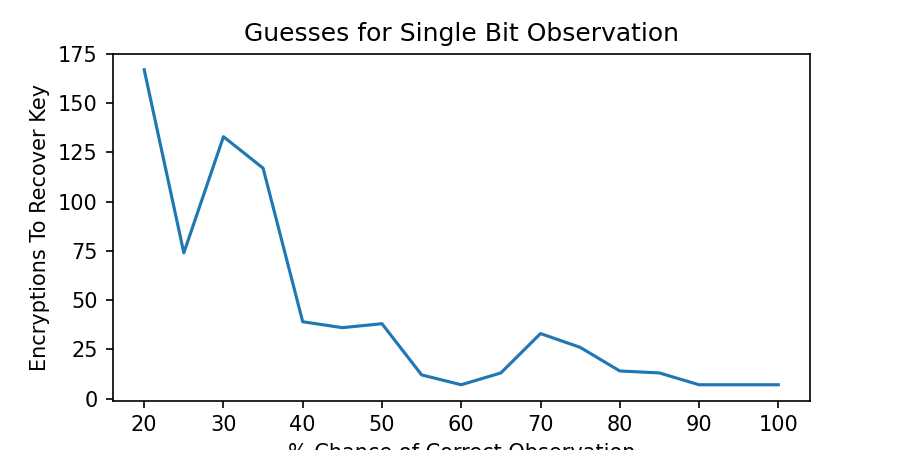

In [33]:
import matplotlib.pylab as plt
%matplotlib widget

plt.figure(figsize=(6,3), dpi=150)
plt.plot(chances_to_try, traces_needed)
plt.title('Guesses for Single Bit Observation')
plt.xlabel('% Chance of Correct Observation')
plt.ylabel('Encryptions To Recover Key')